In [36]:
# ================
# siemka
# ================
# tu sobie przetestujemy SVM i kNN

In [37]:
# path_csv = "/content/drive/MyDrive/combined-dataframes/"
path_csv = r"C:\Users\julia\Desktop\studia\semestr 9\Uczenie maszynowe\voice-commands-recognizing"

In [38]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import RocCurveDisplay


# df = pd.read_csv(os.path.join(path_csv, 'all_essential.csv'))
df = pd.read_csv(os.path.join(path_csv, 'all.csv'))
df.head()

,filename,Slowo,Urzadzenie,Osoba,Odleglosc,Miejsce,MFCC_1,MFCC_2,MFCC_3,MFCC_4,...,Chroma_11,Chroma_12,Zero_Crossing_Rate,Spectral_Flux,Spectral_Slope,Harmonic_Ratio,Temporal_Crest,RMS_Var,Onset_Mean,__source_file__
0,down1_RS_DA_1_1.wav,down,RS,DA,1.0,1.0,-223.668747,169.215683,-32.350449,-16.785284,...,0.234868,0.403291,0.064678,24.835678,-0.000354,0.844285,7.862594,0.005350,1.589770,RS_features.csv
1,down1_RS_DA_2_1.wav,down,RS,DA,2.0,1.0,-212.503128,123.259178,-9.041521,-11.569439,...,0.329275,0.314862,0.121769,25.368217,-0.000339,0.758896,7.159842,0.006710,2.120772,RS_features.csv
2,down1_RS_DA_1_2.wav,down,RS,DA,1.0,2.0,-179.444412,144.561447,-4.579349,-14.211339,...,0.200560,0.326612,0.083405,41.761360,-0.000509,0.723894,4.855120,0.014742,1.957430,RS_features.csv
3,down1_RS_DA_2_3.wav,down,RS,DA,2.0,3.0,-259.799011,125.320580,8.439477,2.764393,...,0.501104,0.378462,0.086649,17.018433,-0.000223,0.654158,9.195688,0.006807,1.711989,RS_features.csv
4,down1_RS_DA_2_4.wav,down,RS,DA,2.0,4.0,-202.233124,177.954422,-30.224281,-33.505360,...,0.578598,0.446853,0.081972,16.212330,-0.000266,0.769493,10.690082,0.003899,1.311862,RS_features.csv


In [40]:
# print(df.groupby('Slowo').size())
df = df[~df['Slowo'].isin(['error'])]
# print(df.groupby('Slowo').size())

# zmniejszamy liczebność klasy other
# df_other = df[df["Slowo"] == "other"]
# df_rest  = df[df["Slowo"] != "other"]

# df_other_down = df_other.sample(n=10000, random_state=42)

# df = pd.concat([df_rest, df_other_down])

print(df.groupby('Slowo').size())

Slowo
down      4061
left      3945
no        4085
off       3889
on        3989
other    56718
right     3922
up        3867
yes       4187
dtype: int64


In [41]:
# pomijamy te cechy ze względu na duże rozbieżności między danymi zebranymi przez nas a tymi z kaggle
df = df.drop(["MFCC_3", "MFCC_4", "MFCC_5", "MFCC_6", "MFCC_8", "MFCC_11", "MFCC_12", "Delta_MFCC", "Spectral_Flatness", "Spectral_Centroid", "Spectral_Bandwidth", "Spectral_Rolloff"], axis=1)
# df1 = df[df["Urzadzenie"] == "other"]
# df2 = df[df["Urzadzenie"] != "other"]
# df1.describe().T
# df2.describe().T

In [42]:
#sprawdzamy wartości NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88663 entries, 0 to 88664
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            88663 non-null  object 
 1   Slowo               88663 non-null  object 
 2   Urzadzenie          88663 non-null  object 
 3   Osoba               88663 non-null  object 
 4   Odleglosc           88663 non-null  float64
 5   Miejsce             88663 non-null  float64
 6   MFCC_1              88663 non-null  float64
 7   MFCC_2              88663 non-null  float64
 8   MFCC_7              88663 non-null  float64
 9   MFCC_9              88663 non-null  float64
 10  MFCC_10             88663 non-null  float64
 11  Spectral_Entropy    86723 non-null  float64
 12  Temporal_Entropy    88663 non-null  float64
 13  Voiced_Ratio        88663 non-null  float64
 14  Spec_Contrast_1     88663 non-null  float64
 15  Spec_Contrast_2     88663 non-null  float64
 16  Spec_Cont

In [43]:
# zastępujemy NaN w kolumnie Spectral_Entropy na wartość średnią
df['Spectral_Entropy'] = df['Spectral_Entropy'].fillna(df['Spectral_Entropy'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88663 entries, 0 to 88664
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            88663 non-null  object 
 1   Slowo               88663 non-null  object 
 2   Urzadzenie          88663 non-null  object 
 3   Osoba               88663 non-null  object 
 4   Odleglosc           88663 non-null  float64
 5   Miejsce             88663 non-null  float64
 6   MFCC_1              88663 non-null  float64
 7   MFCC_2              88663 non-null  float64
 8   MFCC_7              88663 non-null  float64
 9   MFCC_9              88663 non-null  float64
 10  MFCC_10             88663 non-null  float64
 11  Spectral_Entropy    88663 non-null  float64
 12  Temporal_Entropy    88663 non-null  float64
 13  Voiced_Ratio        88663 non-null  float64
 14  Spec_Contrast_1     88663 non-null  float64
 15  Spec_Contrast_2     88663 non-null  float64
 16  Spec_Cont

In [44]:
# usuwamy pozostałe próbki, które zawierają NaN (jest ich niewiele lub wcale)
df = df[df.isna().any(axis=1) == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88663 entries, 0 to 88664
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            88663 non-null  object 
 1   Slowo               88663 non-null  object 
 2   Urzadzenie          88663 non-null  object 
 3   Osoba               88663 non-null  object 
 4   Odleglosc           88663 non-null  float64
 5   Miejsce             88663 non-null  float64
 6   MFCC_1              88663 non-null  float64
 7   MFCC_2              88663 non-null  float64
 8   MFCC_7              88663 non-null  float64
 9   MFCC_9              88663 non-null  float64
 10  MFCC_10             88663 non-null  float64
 11  Spectral_Entropy    88663 non-null  float64
 12  Temporal_Entropy    88663 non-null  float64
 13  Voiced_Ratio        88663 non-null  float64
 14  Spec_Contrast_1     88663 non-null  float64
 15  Spec_Contrast_2     88663 non-null  float64
 16  Spec_Cont

In [45]:
groups = {
    "train": df[df["Urzadzenie"] == "other"],
    "rest": df[df["Urzadzenie"] != "other"]
}
df_train = groups['train']
df_rest = groups['rest']
df_train = df_train.reset_index()
df_rest = df_rest.reset_index()

In [46]:
# podział na cechy i etykiety zbioru treningowego
# X_train = df_train.drop(['index', 'filename', 'Slowo', 'Urzadzenie', 'Osoba', 'Odleglosc', 'Miejsce', '__source_file__'], axis=1)
# y_train = df_train.Slowo.values

# X = df_rest.drop(['index', 'filename', 'Slowo', 'Urzadzenie', 'Osoba', 'Odleglosc', 'Miejsce', '__source_file__'], axis=1)
# y = df_rest.Slowo.values
# print(df_train.groupby('Slowo').size())

# X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X = df.drop(['filename', 'Slowo', 'Urzadzenie', 'Osoba', 'Odleglosc', 'Miejsce', '__source_file__'], axis=1)
y = df.Slowo.values
X_train, X_tv, y_train, y_tv = train_test_split(X, y, test_size = 0.7, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_tv, y_tv, test_size = 0.5, random_state=42)

In [47]:
# sprawdzamy brakujące wartości
# X_val.isna()

In [48]:
# X_test.isna().loc(True)
#X_test[X_test.isna().eq(True).any()]
# X_test.isna().isin([True]).any()
# X_test = X_test[X_test.isna().any(axis=1) == False]

In [49]:
# X_val = X_val[X_val.isna().any(axis=1) == False]

<Axes: >

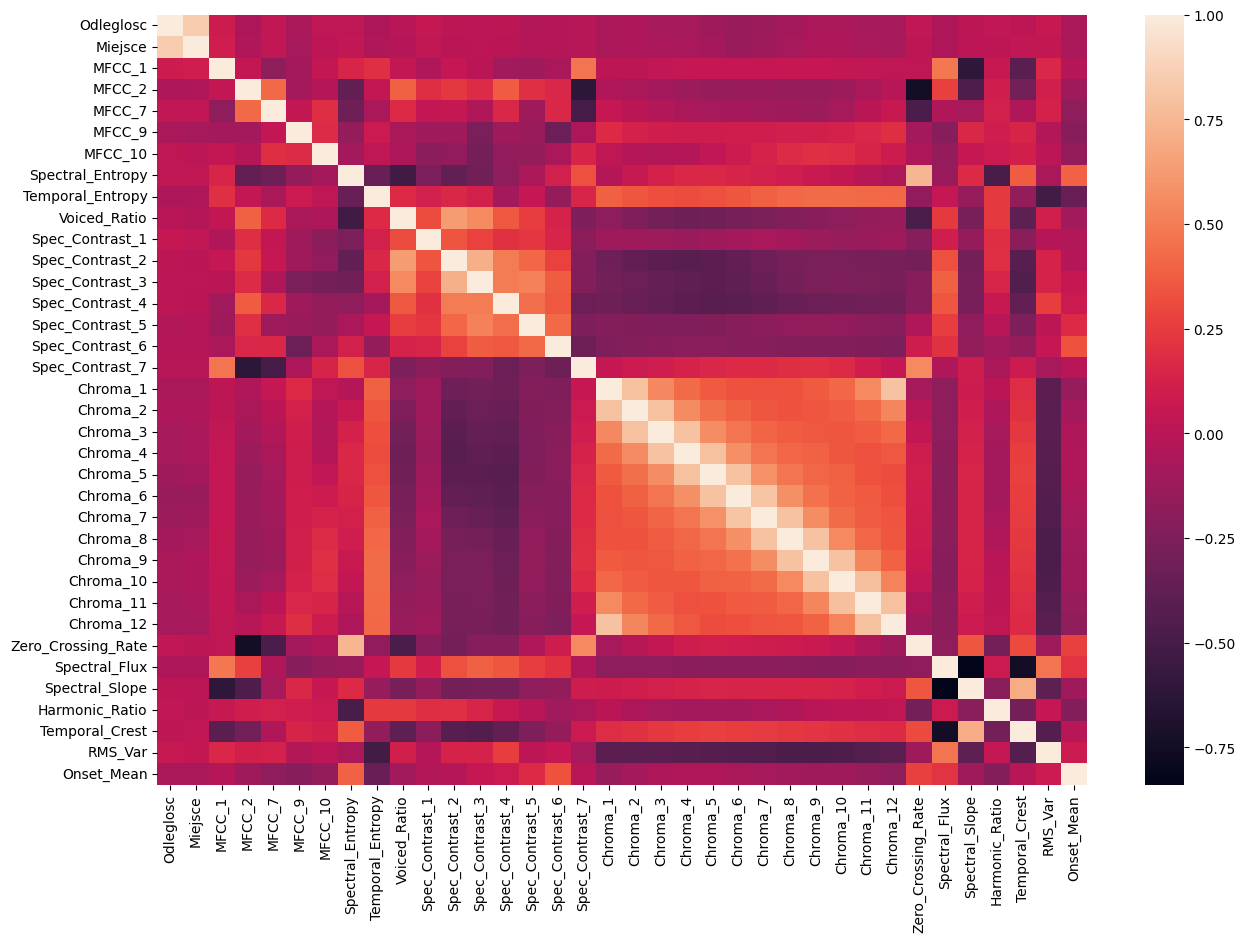

In [50]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True))

In [51]:
# robimy redukcje wymiarowosci - analiza pca z autoskalowaniem

#scaler = StandardScaler()
#X_train_scale = scaler.fit_transform(X_train)
#X_test_scale = scaler.transform(X_test)
#X_val_scale = scaler.transform(X_val)

#pca = PCA()
#X_train_pca = pca.fit_transform(X_train_scale)
#X_test_pca = pca.transform(X_test_scale)
#X_val_pca = pca.transform(X_val_scale)



In [52]:
# sprawdzamy ile wyjasnia ktora skladowa
#sns.barplot(x=np.arange(1, len(pca.explained_variance_)+1), y=pca.explained_variance_)
#plt.title("PCA z autoskalowaniem – udział wariancji")
#plt.xlabel("Składowa główna")
#plt.ylabel("Udział wariancji")
#plt.show()


In [53]:
#explained_variance = pca.explained_variance_ratio_
#plt.figure(figsize=(8, 5))
#plt.plot(np.cumsum(explained_variance), marker='o')
#plt.xlabel('Liczba składowych głównych')
#plt.ylabel('Skumulowana wariancja wyjaśniona')
#plt.title('PCA bez standaryzacji')
#plt.grid()
#plt.tight_layout()
#plt.show()

In [54]:
#sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=y_train, palette='Set1')
#plt.title("Rzut danych na PC1 i PC2")
#plt.xlabel("PC1")
#plt.ylabel("PC2")
#plt.show()

In [55]:
# zaczynamy od kNN
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),       # Obowiązkowe dla kNN!
    ('pca', PCA()),                     # Redukcja wymiarów
    ('knn', KNeighborsClassifier())     # Klasyfikator
])

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'pca__n_components': [0.90, 0.95, 0.99],  # Ile wariancji zachować (90%, 95% lub 99%)
    'knn__n_neighbors': [3, 5, 7, 11],        # Liczba sąsiadów
    'knn__weights': ['uniform', 'distance'],  # Czy bliżsi sąsiedzi są ważniejsi?
    'knn__metric': ['euclidean', 'manhattan'] # Sposób mierzenia odległości
}

grid_search_knn = GridSearchCV(pipeline_knn, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_
print(f"Najlepsze parametry: {grid_search_knn.best_params_}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Najlepsze parametry: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'distance', 'pca__n_components': 0.99}


C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [0.7676893  0.77062185 0.77268968 0.77772765 0.78043462 0.78325438
 0.77979547 0.78276562 0.78562298 0.78787879 0.79058576 0.79374389
 0.7865629  0.78735243 0.79039777 0.79299195 0.79505978 0.79885706
 0.78949545 0.79084894 0.79280397 0.79618768 0.7983307  0.79998496
        nan        nan        nan 0.77656215 0.77979547 0.78351756
        nan        nan        nan 0.78787879 0.79171366 0.79521017
        nan        nan        nan 0.7912249  0.79494699 0.79806752
        nan        nan        nan 0.79671404 0.79998496 0.80167682]
  warnings.warn(


In [57]:
y_pred_knn = best_knn.predict(X_test)
acc = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy kNN: {acc}')
print(classification_report(y_test, y_pred_knn))

Accuracy kNN: 0.8017208043310131
              precision    recall  f1-score   support

        down       0.42      0.56      0.48      1411
        left       0.50      0.51      0.50      1428
          no       0.44      0.50      0.47      1461
         off       0.64      0.43      0.51      1344
          on       0.44      0.39      0.41      1378
       other       0.92      0.99      0.96     19745
       right       0.69      0.11      0.18      1405
          up       0.72      0.51      0.60      1356
         yes       0.74      0.69      0.72      1504

    accuracy                           0.80     31032
   macro avg       0.61      0.52      0.54     31032
weighted avg       0.79      0.80      0.79     31032



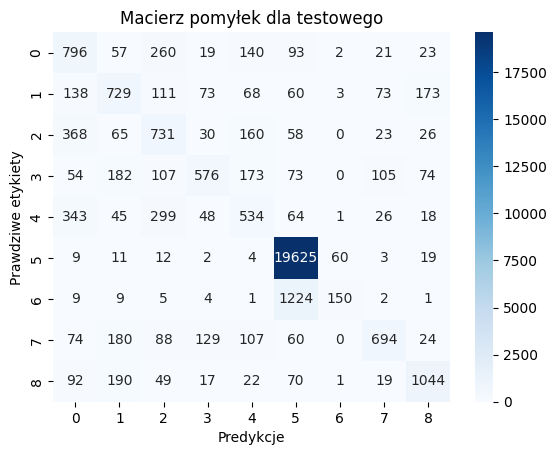


Accuracy (test): 0.8017208043310131


In [58]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Macierz pomyłek dla testowego')
plt.xlabel('Predykcje')
plt.ylabel('Prawdziwe etykiety')
plt.show()
print('\nAccuracy (test):', accuracy_score(y_test, y_pred_knn))

In [59]:
# walidacyjny
y_pred_val_knn = best_knn.predict(X_val)
acc_val = accuracy_score(y_val, y_pred_val_knn)
print(f'Accuracy kNN (walidacyjny): {acc_val}')
print(classification_report(y_val, y_pred_val_knn))

Accuracy kNN (walidacyjny): 0.803596171817098
              precision    recall  f1-score   support

        down       0.43      0.56      0.49      1398
        left       0.50      0.51      0.51      1410
          no       0.46      0.51      0.48      1486
         off       0.66      0.43      0.52      1357
          on       0.44      0.39      0.42      1405
       other       0.92      0.99      0.96     19813
       right       0.65      0.11      0.19      1382
          up       0.68      0.51      0.58      1312
         yes       0.74      0.69      0.71      1470

    accuracy                           0.80     31033
   macro avg       0.61      0.52      0.54     31033
weighted avg       0.79      0.80      0.79     31033



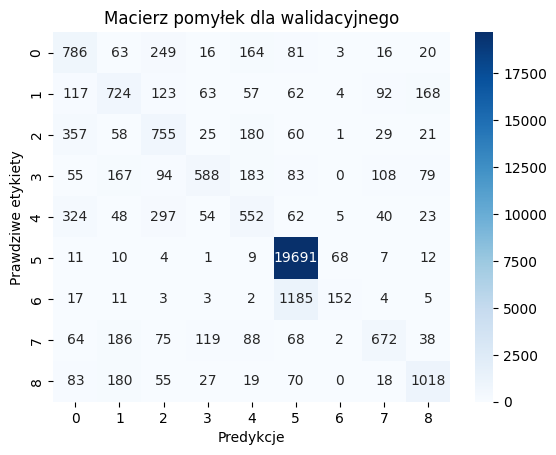


Accuracy (test): 0.803596171817098


In [60]:
cm = confusion_matrix(y_val, y_pred_val_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Macierz pomyłek dla walidacyjnego')
plt.xlabel('Predykcje')
plt.ylabel('Prawdziwe etykiety')
plt.show()
print('\nAccuracy (test):', accuracy_score(y_val, y_pred_val_knn))

In [61]:
from sklearn.svm import SVC
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),      # ZAWSZE skaluj przed SVM/PCA
    ('pca', PCA(n_components=0.95)),   # Zachowaj 95% informacji
    ('svm', SVC(kernel='rbf', class_weight='balanced')) # class_weight pomaga przy niezbalansowanych danych
])

In [62]:

param_grid = {
    'svm__C': [1, 10, 100],
    'svm__gamma': ['scale', 0.01, 0.001]
}

search = GridSearchCV(pipeline_svm, param_grid, cv=3, n_jobs=-1, verbose=2)
search.fit(X_train, y_train)

print(f"Najlepsze parametry: {search.best_params_}")
best_model = search.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Najlepsze parametry: {'svm__C': 100, 'svm__gamma': 'scale'}


In [63]:
y_pred_SVM = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_SVM))

Accuracy: 0.7885408610466615


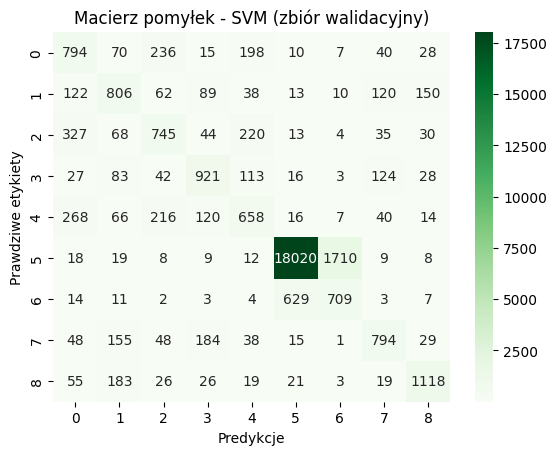


Accuracy (test SVM): 0.7915767086649695


In [64]:
# wektory SVM na zbiorze walidacyjnym
svm_val = confusion_matrix(y_val, best_model.predict(X_val))
sns.heatmap(svm_val, annot=True, fmt='d', cmap='Greens')
plt.title('Macierz pomyłek - SVM (zbiór walidacyjny)')
plt.xlabel('Predykcje')
plt.ylabel('Prawdziwe etykiety')
plt.show()
print('\nAccuracy (test SVM):', accuracy_score(y_val, best_model.predict(X_val)))

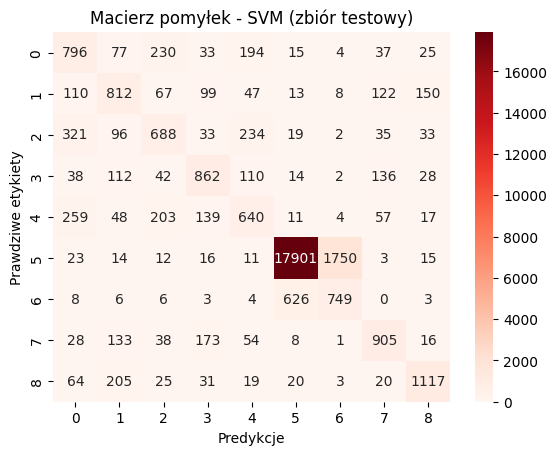


Accuracy (test SVM): 0.7885408610466615


In [65]:
# wektory SVM na zbiorze testowym
svm_test = confusion_matrix(y_test, best_model.predict(X_test))
sns.heatmap(svm_test, annot=True, fmt='d', cmap='Reds')
plt.title('Macierz pomyłek - SVM (zbiór testowy)')
plt.xlabel('Predykcje')
plt.ylabel('Prawdziwe etykiety')
plt.show()
print('\nAccuracy (test SVM):', accuracy_score(y_test, best_model.predict(X_test)))

## Analiza Pareto

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def analyze_pareto_errors(y_true, y_pred, X_data=None, title='Analiza Pareto Błędów'):
    """
    Rysuje wykres Pareto dla błędów i zwraca DataFrame ze szczegółami.
    
    Args:
        y_true: Prawdziwe etykiety
        y_pred: Predykcje modelu
        X_data: (Opcjonalnie) Dane wejściowe lub DataFrame z nazwami plików, 
                pomaga zidentyfikować konkretne próbki.
    Returns:
        df_pareto: DataFrame z typami błędów i ich liczebnością.
        errors_df: DataFrame z pełną listą błędnych próbek.
    """
    # 1. Tworzenie ramki danych z wynikami
    results = pd.DataFrame({'True': y_true, 'Predicted': y_pred})
    
    # Jeśli podano dane wejściowe, dołączamy je (np. żeby widzieć indeksy lub nazwy plików)
    if X_data is not None:
        if isinstance(X_data, pd.DataFrame):
            results = pd.concat([results, X_data.reset_index(drop=True)], axis=1)
        else:
            results['Data_Index'] = range(len(y_true))

    # 2. Filtrowanie tylko błędów
    errors = results[results['True'] != results['Predicted']].copy()
    
    if errors.empty:
        print("Brak błędów do analizy!")
        return None, None

    # 3. Tworzenie "Bucketów" (Kategorii błędów)
    errors['Error_Type'] = errors['True'] + " -> " + errors['Predicted']
    
    # Zliczanie
    error_counts = errors['Error_Type'].value_counts()
    df_pareto = pd.DataFrame({'count': error_counts})
    
    # Obliczenia Pareto
    total_errors = df_pareto['count'].sum()
    df_pareto['percentage'] = (df_pareto['count'] / total_errors) * 100
    df_pareto['cum_percentage'] = df_pareto['percentage'].cumsum()
    
    # Wybieramy te typy błędów, które stanowią 80% wszystkich problemów (lub top 15 dla czytelności)
    top_errors = df_pareto[df_pareto['cum_percentage'] <= 85] # Lekki zapas powyżej 80%
    if len(top_errors) < 5: 
        top_errors = df_pareto.head(10) # Jeśli błędów jest mało typów, pokażmy więcej

    # --- RYSOWANIE ---
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Słupki
    sns.barplot(x=top_errors.index, y=top_errors['count'], ax=ax1, color='steelblue', alpha=0.8)
    ax1.set_ylabel('Liczba błędów', color='steelblue')
    ax1.set_xlabel('Rodzaj pomyłki (Prawda -> Predykcja)')
    ax1.set_xticklabels(top_errors.index, rotation=45, ha='right')
    
    # Linia skumulowana
    ax2 = ax1.twinx()
    ax2.plot(top_errors.index, top_errors['cum_percentage'], color='red', marker='o', linewidth=2)
    ax2.set_ylabel('Skumulowany %', color='red')
    ax2.set_ylim(0, 105)
    
    # Linia odcięcia 80%
    ax2.axhline(80, color='gray', linestyle='--', linewidth=1)
    ax2.text(0, 82, 'Zasada Pareto (80% błędów)', color='gray', fontsize=10)
    
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
    return df_pareto, errors

C:\Users\julia\AppData\Local\Temp\ipykernel_6540\3313115138.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_errors.index, rotation=45, ha='right')


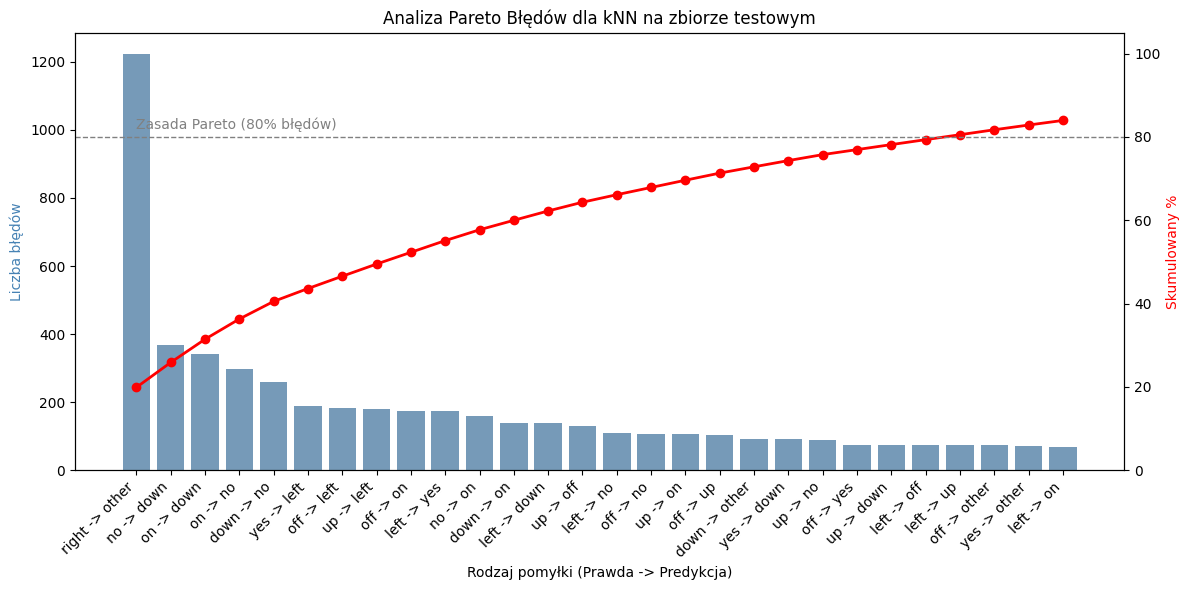

(                count  percentage  cum_percentage
 Error_Type                                       
 right -> other   1224   19.892735       19.892735
 no -> down        368    5.980822       25.873558
 on -> down        343    5.574516       31.448074
 on -> no          299    4.859418       36.307492
 down -> no        260    4.225581       40.533073
 ...               ...         ...             ...
 down -> right       2    0.032504       99.934991
 right -> yes        1    0.016252       99.951243
 on -> right         1    0.016252       99.967496
 right -> on         1    0.016252       99.983748
 yes -> right        1    0.016252      100.000000
 
 [69 rows x 3 columns],
         True Predicted      Error_Type
 3         on     other     on -> other
 9       down        on      down -> on
 13        no      down      no -> down
 21        no        on        no -> on
 34        no      down      no -> down
 ...      ...       ...             ...
 31003     up      left      up

In [70]:
analyze_pareto_errors(y_test, y_pred_knn, title='Analiza Pareto Błędów dla kNN na zbiorze testowym')